In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv("heineken_beer_cleaned.csv", parse_dates=["date"])
df.head()


,date,brewery,sku,product_name,retail_volume,warehouse_volume,inventory_transfer
0,2017-06-01,ALLAGASH BREWING COMPANY,90751,ALLAGASH WHITE 6/4 NR - 12OZ,33.70,125.0,40.0
1,2017-06-01,AMERICAN BEVERAGE CORPORATION,80050,DAILYS PEACH ON THE BEACH POUCH - 10OZ,11.41,5.0,11.0
2,2017-06-01,ANHEUSER BUSCH INC,22904,WILD BLUE BLUEBERRY LAGER 4/6 NR - 12OZ,23.70,124.0,18.0
3,2017-06-01,ANHEUSER BUSCH INC,22935,BUD LIGHT LIME 4/6 NR - 12OZ,53.00,445.0,62.0
4,2017-06-01,ANHEUSER BUSCH INC,22946,BUD LIGHT LIME 2/12 NR - 12OZ,0.00,561.5,0.0


In [2]:
brewery_list = df["brewery"].unique()
sku_list = df["product_name"].unique()

print("Breweries:", len(brewery_list))
print("SKUs:", len(sku_list))


Breweries: 56
SKUs: 657


In [3]:
brewery = "MIAMI DISTRIBUTING CO"
sku = "HEINEKEN LOOSE NR - 12OZ"


In [4]:
filtered = df[(df["brewery"] == brewery) & (df["product_name"] == sku)]

filtered.head()


,date,brewery,sku,product_name,retail_volume,warehouse_volume,inventory_transfer


In [5]:
total_sales = filtered["retail_volume"].sum()
total_warehouse = filtered["warehouse_volume"].sum()
total_transfer = filtered["inventory_transfer"].sum()

total_sales, total_warehouse, total_transfer


(np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [6]:
trend = filtered.groupby("date")["retail_volume"].sum().reset_index()

fig = px.line(trend, x="date", y="retail_volume",
              title="Monthly Demand Trend",
              markers=True)

fig.show()


In [7]:
ts = filtered.groupby("date")["retail_volume"].sum()
ts = ts.asfreq("MS")
ts = ts.interpolate()


In [8]:
model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
forecast = results.forecast(steps=6)
forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:534: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



IndexError: index 0 is out of bounds for axis 0 with size 0

In [9]:
df.shape


(10791, 7)

In [10]:
df["brewery"].value_counts().head(15)


,count
brewery,
ANHEUSER BUSCH INC,1911
MILLER BREWING COMPANY,1253
BOSTON BEER CORPORATION,824
HEINEKEN USA,717
CROWN IMPORTS,613
DIAGEO NORTH AMERICA INC,518
FLYING DOG BREWERY LLLP,476
BUCK DISTRIBUTING COMPANY INC,343
SIERRA NEVADA BREWING CO,316


In [11]:
df[df["brewery"] == "HEINEKEN USA"]["product_name"].value_counts().head(15)


,count
product_name,
HEINEKEN LIGHT 2/12 NR - 12OZ,24
HEINEKEN LIGHT 4/6 NR - 12OZ,24
HEINEKEN DRAFT KEG CAN - 5L,24
HEINEKEN SUITCASE CANS 24/12OZ,24
HEINEKEN LOOSE NR - 12OZ,24
AMSTEL LIGHT LOOSE NR - 12OZ,24
STRONGBOW GOLD CIDER 4/6NR - 11.2OZ,24
HEINEKEN 18PK NR - 12OZ,24
HEINEKEN 4/6NR - 7OZ,24


In [12]:
brewery = "HEINEKEN USA"
sku = "HEINEKEN LOOSE NR - 12OZ"

filtered = df[(df["brewery"] == brewery) & (df["product_name"] == sku)]
filtered.shape


(24, 7)

In [13]:
ts = filtered.groupby("date")["retail_volume"].sum()
ts = ts.asfreq("MS")     # force monthly
ts = ts.interpolate()    # fill missing values

ts


,retail_volume
date,
2017-06-01,767.00
2017-07-01,950.00
2017-08-01,706.00
2017-09-01,662.00
2017-10-01,633.00
2017-11-01,814.00
2017-12-01,851.00
2018-01-01,485.00
2018-02-01,615.00


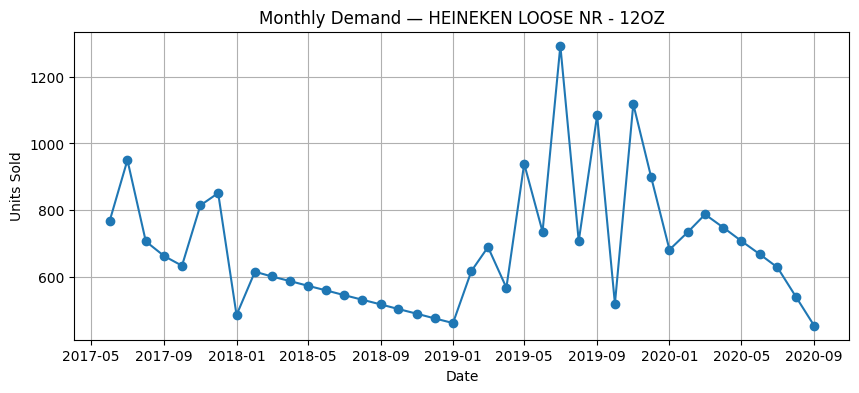

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(ts, marker="o")
plt.title("Monthly Demand — HEINEKEN LOOSE NR - 12OZ")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid()
plt.show()


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
results.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                      retail_volume   No. Observations:                   40
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -75.469
Date:                            Wed, 26 Nov 2025   AIC                            160.938
Time:                                    18:06:40   BIC                            163.763
Sample:                                06-01-2017   HQIC                           160.357
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.122     -7.340      0.000      -1.136      -0.657
ma.L1         -5.8683     12.086     -0.486      0.627     -29.556      17.819
ar.S.L12      -1.0423      0.157     -6.649      0.000      -1.350      -0.735
ma.S.L12      -0.9912    130.113     -0.008      0.994    -256.008     254.026
sigma2       100.7950   1.31e+04      0.008      0.994   -2.55e+04    2.57e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.72   Prob(JB):                         0.76
Heteroskedasticity (H):               0.64   Skew:                             0.22
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
brewery = "HEINEKEN USA"
sku = "HEINEKEN LOOSE NR - 12OZ"

filtered = df[(df["brewery"] == brewery) & (df["product_name"] == sku)]

ts = filtered.groupby("date")["retail_volume"].sum()
ts = ts.asfreq("MS")
ts = ts.interpolate()


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [20]:
forecast = results.forecast(steps=6)
forecast


,predicted_mean
2020-10-01,612.419223
2020-11-01,468.355297
2020-12-01,507.743739
2021-01-01,489.056086
2021-02-01,634.741030
2021-03-01,708.638389
